### Linear Regression Theory

###### The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

![title](https://miro.medium.com/max/1280/1*fX95txC9xSwSPeP6ch2nmg.gif)

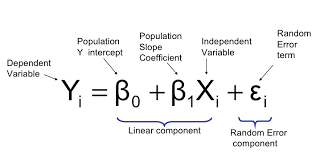

## The equation of the above line is :


##### Y= mx + b

###### Where b is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.


#### y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn



In [1]:
import time
start = time.process_time()

# import all necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split 
from sklearn import metrics

import math



## We load the data into variables;which are in the form of dataframes.

IncomeConsumptionDataset = pd.read_csv('E:\\Kaggle & ML Projects\\Data Science - ML Models\\Supervised\\Regression problem\\Algorithms\\Linear Regression\\IncomeVsConsumption.csv')

## We used dropna() to remove the rows containing NaN values and now we have dataframes having valid values all together.

IncomeConsumptionDataset = IncomeConsumptionDataset.dropna() 

In [2]:
IncomeConsumptionDataset.head()

,Income (x),Consumption (y)
0,119,154
1,85,123
2,97,125
3,95,130
4,120,151


In [3]:
IncomeConsumptionDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Income (x)       40 non-null     int64
 1   Consumption (y)  40 non-null     int64
dtypes: int64(2)
memory usage: 960.0 bytes


In [4]:
IncomeConsumptionDataset.describe()

,Income (x),Consumption (y)
count,40.000000,40.000000
mean,98.350000,133.000000
std,11.802977,10.717826
min,81.000000,115.000000
25%,88.750000,124.750000
50%,97.500000,131.500000
75%,108.000000,141.750000
max,120.000000,154.000000


In [5]:
## We convert our dataframes to matrices and we can find out mean and median of the matrices

X=IncomeConsumptionDataset['Income (x)'].values.reshape(-1,1)
Y=IncomeConsumptionDataset['Consumption (y)'].values.reshape(-1,1)

print('Mean of X is',np.mean(X),'\n')
# print('Median of X is',np.median(X),'\n')

print('Mean of Y is',np.mean(Y),'\n')
# print('Median of Y is',np.median(Y),'\n')

Mean of X is 98.35 

Mean of Y is 133.0 



In [6]:
X.dtype, Y.dtype

(dtype('int64'), dtype('int64'))

In [7]:
X.shape, Y.shape

((40, 1), (40, 1))

###### Divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [8]:
# Independent variable

X = IncomeConsumptionDataset['Income (x)'].values

# Dependent variable

y = IncomeConsumptionDataset['Consumption (y)'].values

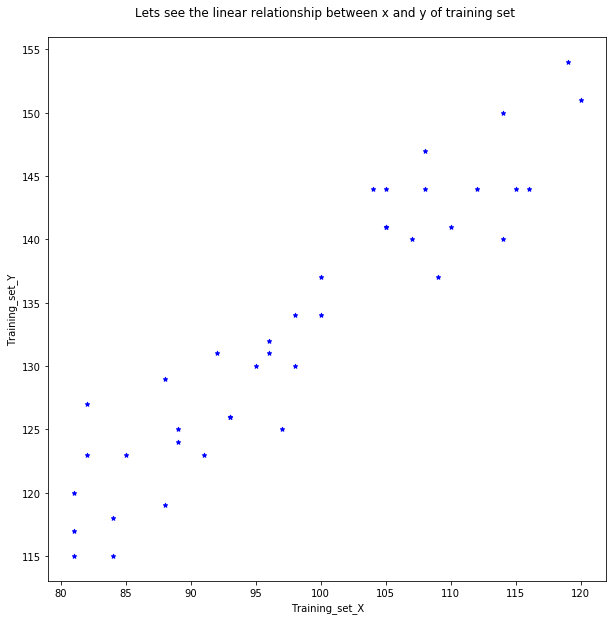

In [9]:
pt.figure(figsize=(10,10))
pt.title('Lets see the linear relationship between x and y of training set \n')
pt.scatter(X,Y,s=20,c='blue',marker='*')
pt.xlabel('Training_set_X')
pt.ylabel('Training_set_Y')
pt.show()

#### Now split 80% of the data into Training set while 20% of the data to Test set

#### The test_size variable is where we actually specify the proportion of the Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'))

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28,), (28, 1), (12,), (12, 1))

In [13]:
X_train =IncomeConsumptionDataset['Income (x)'].values.reshape(-1,1)
y_train=IncomeConsumptionDataset['Consumption (y)'].values.reshape(-1,1)

X_test =IncomeConsumptionDataset['Income (x)'].values.reshape(-1,1)
y_test=IncomeConsumptionDataset['Consumption (y)'].values.reshape(-1,1)

In [14]:
# Train & Test Model 

clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Intercept of Regression : ", str(clf.intercept_))
print("Slope of Regression : ", str(clf.coef_))
print("R2 Score : " + str(r2_score(y_test,y_pred))) 
print("Pearson Coefficient Correlation (r) : " + str(math.sqrt(r2_score(y_test,y_pred))))
print("Mean squared error : " + str(mean_squared_error(y_test,y_pred)))

Intercept of Regression :  [49.1334137]
Slope of Regression :  [[0.85273601]]
R2 Score : 0.881858464452023
Pearson Coefficient Correlation (r) : 0.9390731944060713
Mean squared error : 13.231851981373428


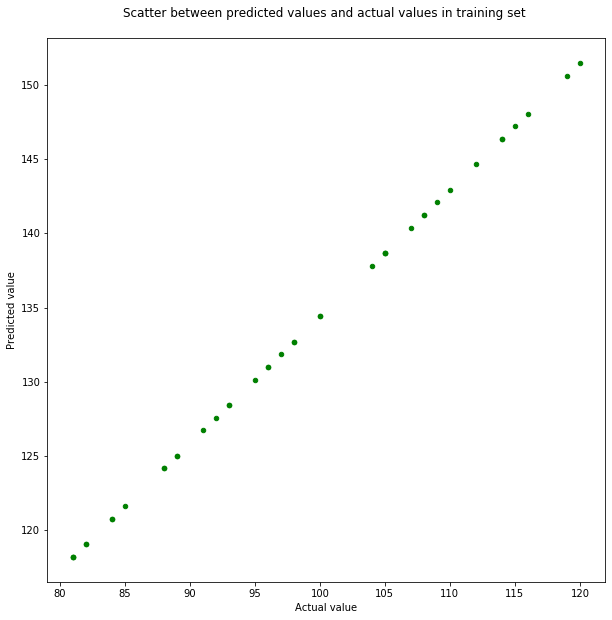

In [15]:

pt.figure(figsize=(10,10))

p=clf.predict(X_test)

pt.title('Scatter between predicted values and actual values in training set \n')
pt.scatter(X,p,s=20,color = 'green')

pt.xlabel('Actual value')
pt.ylabel('Predicted value')

pt.show()

In [16]:
df = pd.DataFrame({'X': X.flatten(), 'Actual Y': Y.flatten(), 'Predicted': y_pred.flatten()})
df

,X,Actual Y,Predicted
0,119,154,150.608999
1,85,123,121.615974
2,97,125,131.848806
3,95,130,130.143334
4,120,151,151.461735
5,92,131,127.585126
6,105,141,138.670694
7,110,141,142.934374
8,98,130,132.701542
9,98,134,132.701542


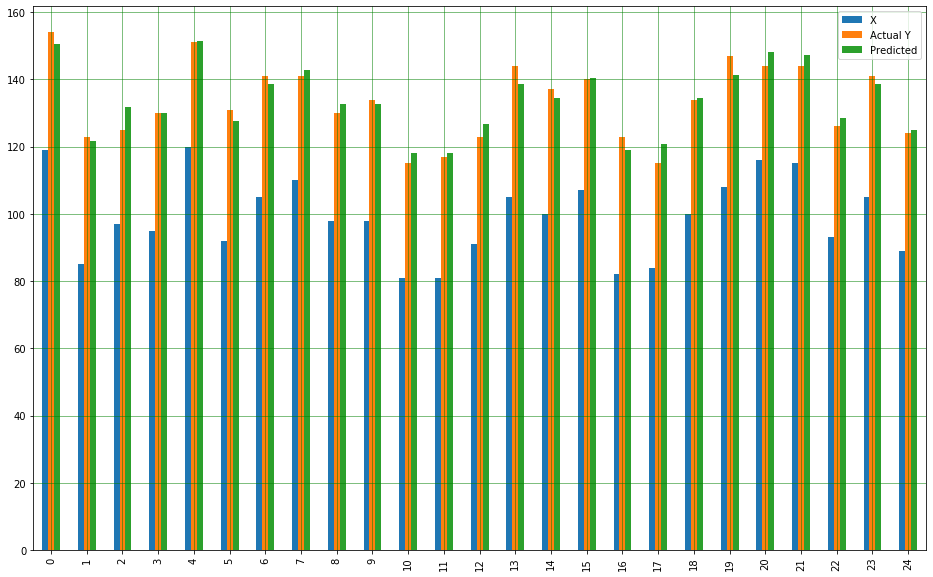

Time consumed to execute complete code : 3.15625 sec


In [17]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
pt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
pt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pt.show()

# end = datetime.now()
# time_taken = end - start
# print('Time consumed to execute complete code: ',time_taken)

print(f'Time consumed to execute complete code : {time.process_time() - start}',"sec")